In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('bmh')
sns.set_style({'axes.grid':False}) 

In [ ]:
pip install datashader

In [ ]:
import datashader as ds
import datashader.transfer_functions as tf
from datashader.colors import viridis, inferno

In [ ]:
import folium as flm
from folium.plugins import HeatMap

In [ ]:
dtypes = {}
for key in ['amount', 'longitude_of_pickup', 'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff']:
    dtypes[key] = 'float32'
for key in ['no_of_passenger']:
    dtypes[key] = 'uint8'

In [ ]:
from sklearn.model_selection import train_test_split
data=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv')
train, test = train_test_split(data,train_size = 0.7, test_size = 0.3)

In [ ]:
print('Dtypes after downcasting except pickup_datetime:')
display(train.dtypes)

Dtypes after downcasting except pickup_datetime:


unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

In [ ]:
train['date_time_of_pickup'] = pd.to_datetime(train['date_time_of_pickup'], infer_datetime_format=True)
test['date_time_of_pickup'] = pd.to_datetime(test['date_time_of_pickup'], infer_datetime_format=True)

In [ ]:
print('Memory usage(in MB) by variables after conversion:')
display(np.round(train.memory_usage(deep = True)/1024**2, 4))

Memory usage(in MB) by variables after conversion:


Index                   0.2670
unique_id               2.1362
amount                  0.2670
date_time_of_pickup     0.2670
longitude_of_pickup     0.2670
latitude_of_pickup      0.2670
longitude_of_dropoff    0.2670
latitude_of_dropoff     0.2670
no_of_passenger         0.2670
dtype: float64

In [ ]:
print('Preview train data:')
display(train.head())
print('Preview test data:')
display(test.head())

Preview train data:


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
17948,33:00.0,5.5,2013-12-02 07:33:00+00:00,-73.976300,40.740160,-73.972570,40.750230,1
17695,32:00.0,4.1,2010-07-20 14:32:00+00:00,-73.962068,40.776467,-73.955983,40.781712,1
12136,34:00.0,7.7,2009-04-25 22:34:00+00:00,-73.994002,40.741157,-73.976535,40.765153,1
17148,30:00.0,7.7,2009-09-28 16:30:00+00:00,-73.994877,40.727565,-74.011378,40.708295,1
32106,25:00.0,3.7,2011-12-07 21:25:00+00:00,-74.007878,40.725317,-74.006262,40.733800,1


Preview test data:


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
45683,32:34.0,15.0,2013-11-03 02:32:34+00:00,-73.954978,40.777882,-74.004427,40.747834,1
33786,57:00.0,11.5,2013-10-15 07:57:00+00:00,-74.006705,40.730855,-73.988060,40.741027,5
37397,37:48.0,8.9,2009-10-03 20:37:48+00:00,-74.000977,40.741811,-73.977866,40.744265,1
33053,59:00.0,5.0,2014-04-30 14:59:00+00:00,-73.982815,40.748482,0.000000,0.000000,1
41821,41:33.0,14.5,2014-05-21 07:41:33+00:00,-73.973462,40.748502,-73.960131,40.773925,1


In [ ]:
print('Missing values in train data:')
display(train.isna().sum())

print('Missing values in test data:')
display(test.isna().sum())

Missing values in train data:


unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

Missing values in test data:


unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [ ]:
train.dropna(how = 'any', axis = 0, inplace = True)
print('Shape of the df after dropping missing rows:{}'.format(train.shape))

Shape of the df after dropping missing rows:(35000, 8)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


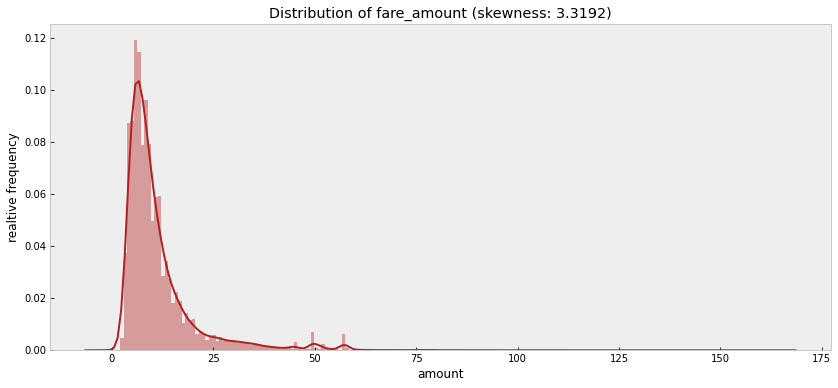

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
sns.distplot(train.amount, bins = 200, color = 'firebrick', ax = ax)
ax.set_title('Distribution of fare_amount (skewness: {:0.5})'.format(train.amount.skew()))
ax.set_ylabel('realtive frequency')
plt.show()

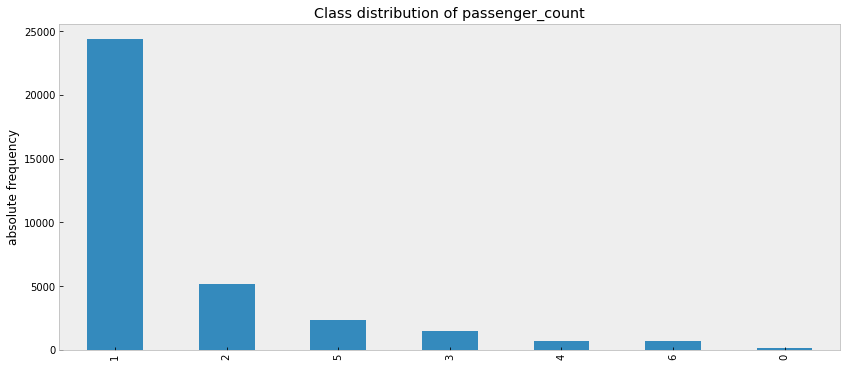

In [ ]:
fig, ax = plt.subplots(figsize = (14,6))
class_dist = train.no_of_passenger.value_counts()
class_dist.plot(kind = 'bar', ax = ax)
ax.set_title('Class distribution of passenger_count')
ax.set_ylabel('absolute frequency')
plt.show()

In [ ]:
train.amount.describe()

count    35000.000000
mean        11.335875
std          9.552814
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        165.000000
Name: amount, dtype: float64

In [ ]:
neg_fare = train.loc[train.amount<0, :].index
train.drop(neg_fare, axis = 0, inplace = True)
train.amount.describe()

count    34996.000000
mean        11.337482
std          9.552177
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        165.000000
Name: amount, dtype: float64

In [ ]:
fares_to_drop = train.loc[(train.amount>100) | (train.amount<2.5), :].index
train.drop(fares_to_drop, axis = 0, inplace = True)
print('Shape of train data after dropping outliers from fare_amount:{}'.format(train.shape))

Shape of train data after dropping outliers from fare_amount:(34985, 8)


In [ ]:
def percentile(variable):
    two_and_half = variable.quantile(0.25)
    ninty_seven_half = variable.quantile(0.975)
    print('2.5 and 97.5 percentile of {} is respectively: {:0.2f}, and {:0.2f}'.format(variable.name, two_and_half, ninty_seven_half))
    
percentile(train.latitude_of_pickup)
percentile(train.latitude_of_dropoff)
percentile(train.longitude_of_pickup)
percentile(train.longitude_of_dropoff) 

2.5 and 97.5 percentile of latitude_of_pickup is respectively: 40.73, and 40.80
2.5 and 97.5 percentile of latitude_of_dropoff is respectively: 40.73, and 40.81
2.5 and 97.5 percentile of longitude_of_pickup is respectively: -73.99, and -73.78
2.5 and 97.5 percentile of longitude_of_dropoff is respectively: -73.99, and -73.78


In [ ]:
train = train.loc[train.latitude_of_pickup.between(left = 40, right = 42), :]
train = train.loc[train.latitude_of_dropoff.between(left = 40, right = 42), :]
train = train.loc[train.longitude_of_pickup.between(left = -75, right = -72), :]
train = train.loc[train.longitude_of_dropoff.between(left = -75, right = -72), :]
print('Shape of train data after after dropping outliers from lats and lons: {}'.format(train.shape))

Shape of train data after after dropping outliers from lats and lons: (34219, 8)


In [ ]:
train.no_of_passenger.describe()

count    34219.000000
mean         1.668517
std          1.288899
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [ ]:
passenger_count_to_drop = train.loc[(train.no_of_passenger==208) | (train.no_of_passenger==129) | (train.no_of_passenger==9) | (train.no_of_passenger==7)].index
train.drop(passenger_count_to_drop, axis = 0, inplace = True)
print('Shape of train data after dropping outliers from passenger_count:{}'.format(train.shape))
display(train.no_of_passenger.describe())

Shape of train data after dropping outliers from passenger_count:(34219, 8)


count    34219.000000
mean         1.668517
std          1.288899
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: no_of_passenger, dtype: float64

In [ ]:
merged = pd.concat([train,test], axis = 0, sort=False)

In [ ]:
def great_circle_distance(lon1,lat1,lon2,lat2):
    R = 6371000
    
    lon1,lat1,lon2,lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    dis_lon = lon2 - lon1
    dis_lat = lat2 - lat1
    
    a = np.sin(dis_lat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dis_lon/2)**2
    c = 2*np.arctan2(np.sqrt(a), np.sqrt(1-a))
    dis_m = R*c 
    dis_km = dis_m/1000
    return dis_km

merged['great_circle_distance'] = great_circle_distance(merged.longitude_of_pickup, merged.latitude_of_pickup, merged.longitude_of_dropoff, merged.latitude_of_dropoff)

In [ ]:
R = 6371000
lon1,lat1,lon2,lat2 = map(np.radians, [merged.longitude_of_pickup, merged.latitude_of_pickup, merged.longitude_of_dropoff, merged.latitude_of_dropoff])
merged['pickup_x'] = R*np.cos(lon1)*np.cos(lat1)
merged['pickup_y'] = R*np.sin(lon1)*np.cos(lat1)
merged['dropoff_x'] = R*np.cos(lon2)*np.cos(lat2)
merged['dropoff_y'] = R*np.sin(lon2)*np.cos(lat2)

x1 = merged['pickup_x']
y1 = merged['pickup_y']
x2 = merged['dropoff_x']
y2 = merged['dropoff_y']
merged['euclidean_distance'] = (np.sqrt(( x1 - x2)**2 + ( y1 - y2)**2))/1000 # in km

In [ ]:
merged['manhattan_distance'] = (np.abs(x1 - x2) + np.abs(y1 - y2))/1000

In [ ]:
merged['abs_lon_diff'] = np.abs(merged.longitude_of_pickup - merged.longitude_of_dropoff)
merged['abs_lat_diff'] = np.abs(merged.latitude_of_pickup - merged.latitude_of_dropoff)

In [ ]:
merged['pickup_hour'] = merged.date_time_of_pickup.dt.hour
merged['pickup_date'] =  merged.date_time_of_pickup.dt.day
merged['pickup_day_of_week'] =  merged.date_time_of_pickup.dt.dayofweek
merged['pickup_month'] =  merged.date_time_of_pickup.dt.month
merged['pickup_year'] =  merged.date_time_of_pickup.dt.year

In [ ]:
print('Current Data Types:')
display(merged.dtypes)
print('\n Total memory consumption in MB: {}'.format(np.sum(merged.memory_usage(deep = True)/1024**2)))

Current Data Types:


unique_id                             object
amount                               float64
date_time_of_pickup      datetime64[ns, UTC]
longitude_of_pickup                  float64
latitude_of_pickup                   float64
longitude_of_dropoff                 float64
latitude_of_dropoff                  float64
no_of_passenger                        int64
great_circle_distance                float64
pickup_x                             float64
pickup_y                             float64
dropoff_x                            float64
dropoff_y                            float64
euclidean_distance                   float64
manhattan_distance                   float64
abs_lon_diff                         float64
abs_lat_diff                         float64
pickup_hour                            int64
pickup_date                            int64
pickup_day_of_week                     int64
pickup_month                           int64
pickup_year                            int64
dtype: obj


 Total memory consumption in MB: 11.265335083007812


In [ ]:
merged.drop(['unique_id', 'date_time_of_pickup'], axis = 1, inplace = True)

In [ ]:
merged.loc[:, ['pickup_hour', 'pickup_date', 'pickup_day_of_week', 'pickup_month']] = merged.loc[:, ['pickup_hour', 'pickup_date', 'pickup_day_of_week', 'pickup_month']].astype(np.uint8)
merged.loc[:, ['great_circle_distance', 'euclidean_distance', 'manhattan_distance']] = merged.loc[:, ['great_circle_distance', 'euclidean_distance', 'manhattan_distance']].astype(np.float32)
merged.loc[:, ['pickup_year']] = merged.loc[:, ['pickup_year']].astype('int16')

print('Total memory consumption after downcasting in MB: {}'.format(np.sum(merged.memory_usage(deep = True)/1024**2)))

Total memory consumption after downcasting in MB: 5.726545333862305


In [ ]:
train_df = merged.iloc[0:34219, :]
test_df = merged.iloc[34219:, :] 
test_df.drop('amount', axis = 1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


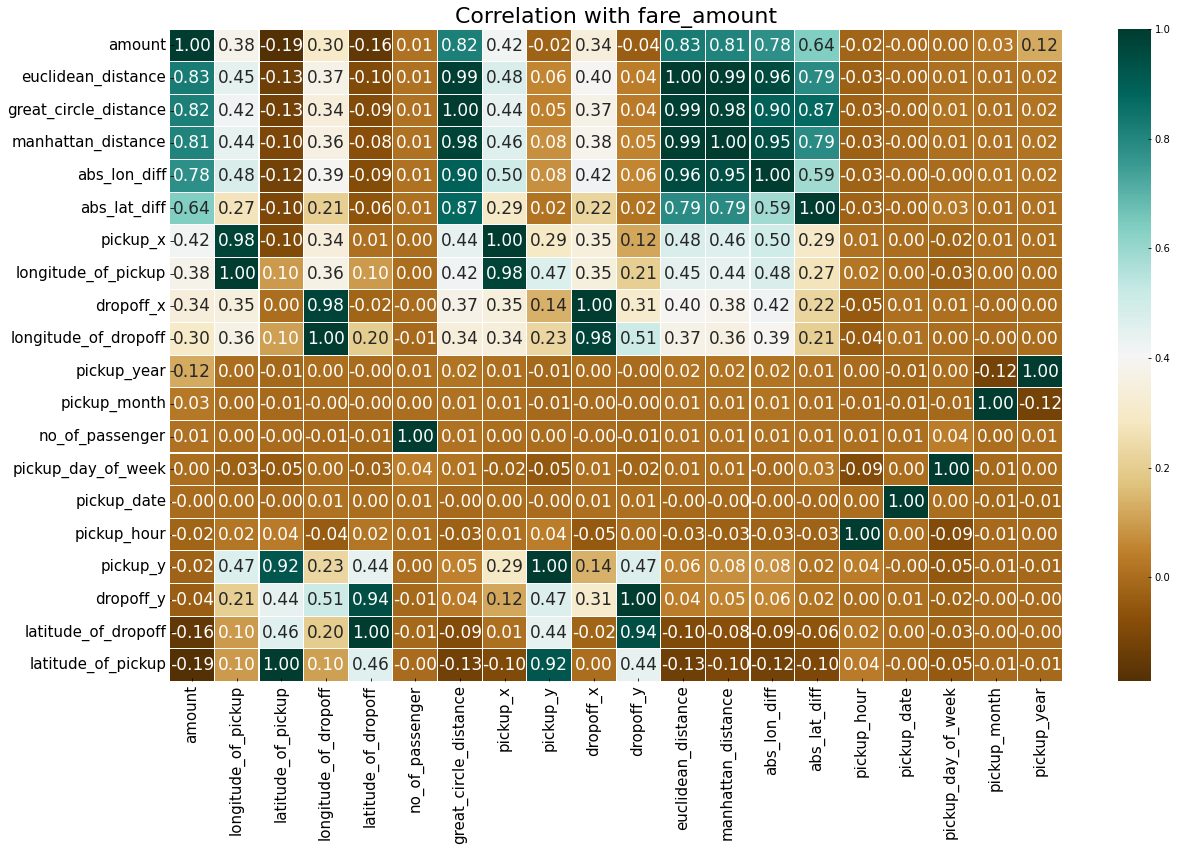

In [ ]:
corr = train_df.corr().sort_values(by='amount', ascending=False)
fig, ax = plt.subplots(figsize = (20,12))
sns.heatmap(corr, annot = True, cmap ='BrBG', ax = ax, fmt='.2f', linewidths = 0.05, annot_kws = {'size': 17})
ax.tick_params(labelsize = 15)
ax.set_title('Correlation with fare_amount', fontsize = 22)
plt.show()

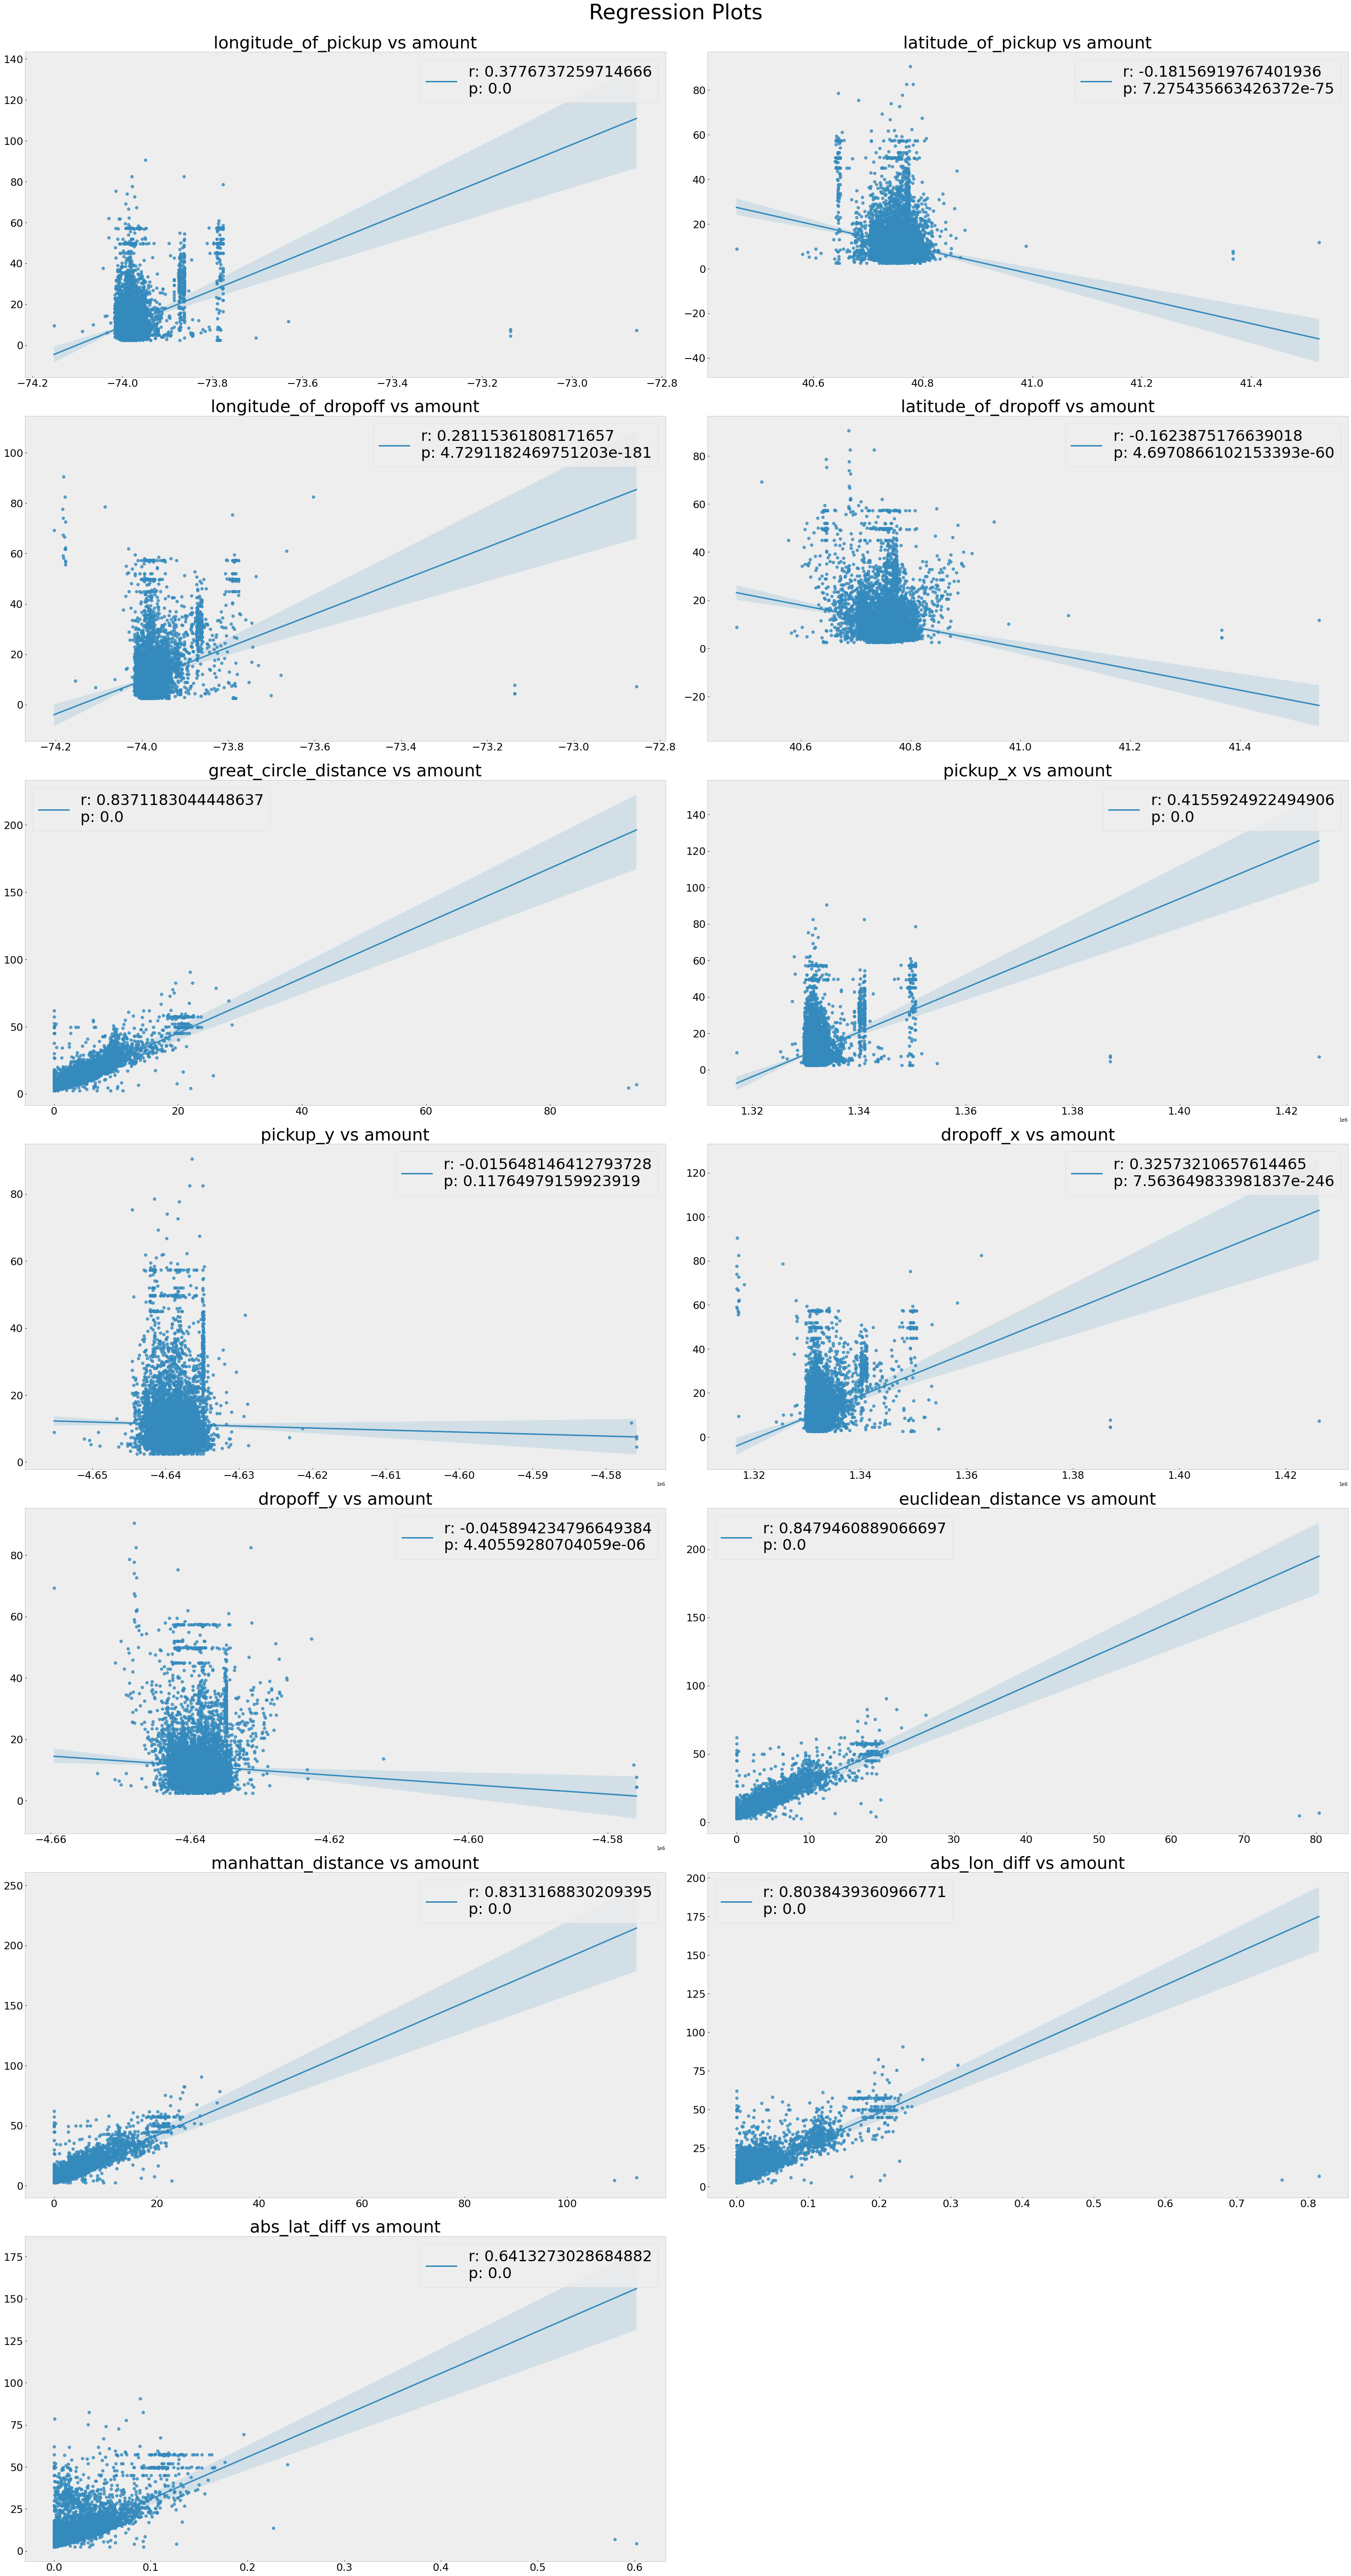

In [ ]:
continuous_var = train_df.iloc[0:10000, :].select_dtypes(include = ['float32', 'float64']).drop('amount', axis = 1)
fig, axes = plt.subplots(7,2, figsize = (40,80))
for ax, column in zip(axes.flatten(), continuous_var.columns):
    x = continuous_var[column]
    y = train_df.amount.iloc[0:10000]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    sns.regplot(x = continuous_var[column], y = y, ax = ax, line_kws={'label':'r: {}\np: {}'.format(r_value,p_value)})
    ax.set_title('{} vs amount'.format(column), fontsize = 36)
    fig.suptitle('Regression Plots', fontsize = 45)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 22)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 22)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.legend(loc = 'best', fontsize = 32)
fig.delaxes(ax = axes[6,1])
fig.tight_layout(rect = [0, 0.03, 1, 0.97])

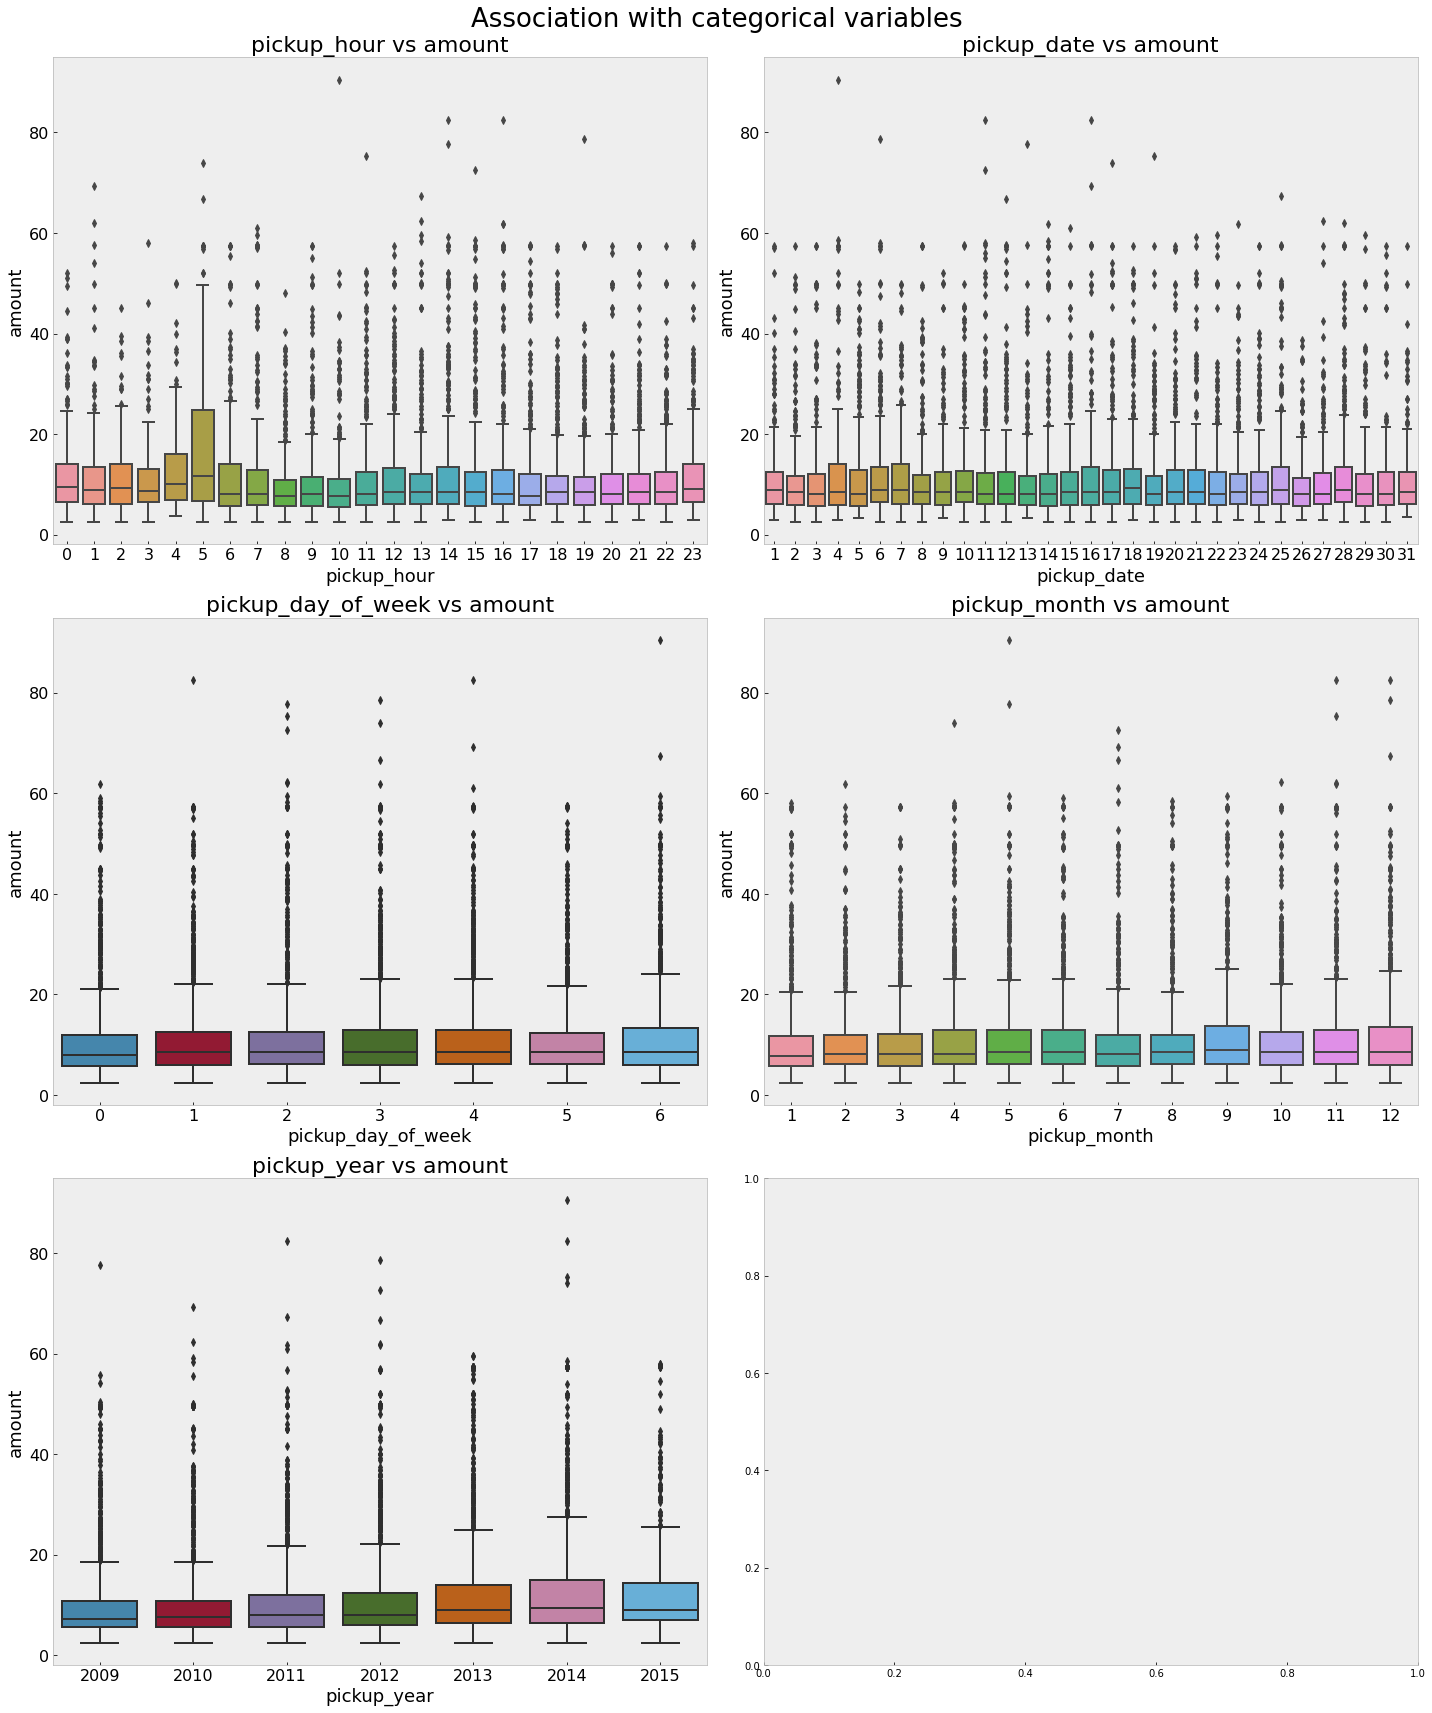

In [ ]:
cat_var = train_df.iloc[0:10000, :].select_dtypes(include = ['uint8'])
cat_var = pd.concat([cat_var, train_df.pickup_year.iloc[0:10000]], axis = 1)

fig, axes = plt.subplots(3,2,figsize = (20,25))
for ax, column in zip(axes.flatten(), cat_var.columns):
    sns.boxplot(x = cat_var[column], y = train_df.amount.iloc[0:10000], ax = ax)
    ax.set_title('{} vs amount'.format(column), fontsize = 22)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
    ax.set_xlabel(column, fontsize = 18)
    ax.set_ylabel('amount', fontsize = 18)
    fig.suptitle('Association with categorical variables', fontsize = 26)
fig.tight_layout(rect = [0, 0.03, 1, 0.97])

In [ ]:
pivot_year = pd.pivot_table(train_df, values = 'amount', index = 'pickup_year', aggfunc = ['mean'])
print('Mean fare_amount across the classes of pickup_year: \n{}'.format(pivot_year))

Mean fare_amount across the classes of pickup_year: 
                  mean
                amount
pickup_year           
2009         10.031612
2010         10.099105
2011         10.464260
2012         11.184766
2013         12.423610
2014         13.102155
2015         13.073199


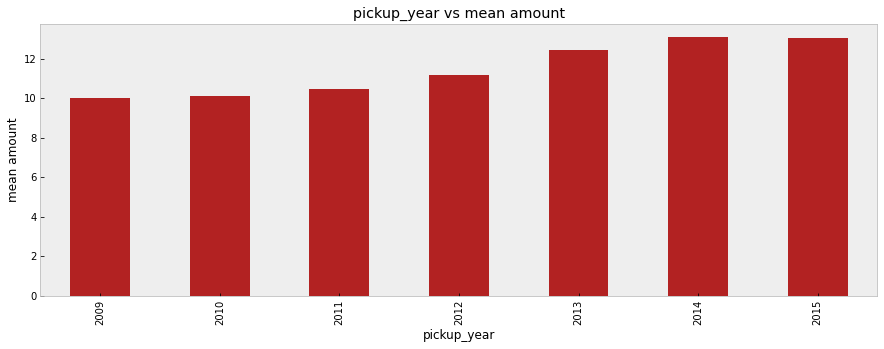

In [ ]:
fig, ax = plt.subplots(figsize = (15,5))
pivot_year.plot(kind = 'bar', legend = False, color = 'firebrick', ax = ax)
ax.set(title = 'pickup_year vs mean amount', ylabel= 'mean amount')
plt.show()

In [ ]:
print('x_range and y_range for pickup_locations:')
print(train_df.longitude_of_pickup.min(), train_df.longitude_of_pickup.max())
print(train_df.latitude_of_pickup.min(), train_df.latitude_of_pickup.max())

print('\nx_range and y_range for dropoff_locations:')
print(train_df.longitude_of_dropoff.min(), train_df.longitude_of_dropoff.max())
print(train_df.latitude_of_dropoff.min(), train_df.latitude_of_dropoff.max())

x_range and y_range for pickup_locations:
-74.7 -72.856968
40.121653 41.523217

x_range and y_range for dropoff_locations:
-74.302143 -72.85494
40.164927 41.543217


In [ ]:
def plot_location(lon,lat, c_map):
    pickup_range = dropoff_range = x_range, y_range = ((-74.05, -73.7), (40.6, 40.85))
    cvs = ds.Canvas(plot_width = 1080, plot_height = 600, x_range = x_range, y_range = y_range)
    agg = cvs.points(train, lon, lat)
    img = tf.shade(agg, cmap = c_map, how = 'eq_hist')
    return tf.set_background(img, 'black')

In [ ]:
def plot_map(lat, lon):
    map_nyc = flm.Map(location = [40.7141667, -74.0063889], zoom_start = 12, tiles = "Stamen Toner")
    flm.Marker(location = [40.7141667, -74.0063889], icon = flm.Icon(color = 'red'), popup='NYC').add_to(map_nyc)
    lat_lon = train.loc[0:20000, [lat, lon]].values
    HeatMap(lat_lon, radius = 10).add_to(map_nyc)
    return map_nyc

In [ ]:
y_train = train_df.amount
X_train = train_df.drop(['amount'], axis = 1)
X_test = test_df

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

In [ ]:
submission = pd.DataFrame()
submission['unique_id'] = test.unique_id
submission['amount'] = y_pred
submission.to_csv('sub_with_linear_reg', index = False)